In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = '/content/drive/MyDrive/Colab Notebooks/UAS_ProjectPD/dataset_nasi.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/UAS_ProjectPD/')
zip_ref.close()
train_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/UAS_ProjectPD/dataset_nasi')

In [ ]:
train_datagen = ImageDataGenerator(rescale =1./255,
     rotation_range = 20,
     zoom_range = 0.2,
     shear_range = 0.2,
     fill_mode = 'nearest',
     validation_split = 0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training')

validation_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='validation')

Found 503 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.layers[0].trainable = False

234545216/234545216 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
history = model.fit(train_generator,
                                validation_data = validation_generator,
                                epochs = 50,
                                verbose = 2)

Epoch 1/50
63/63 - 25s - loss: 2.8809 - accuracy: 0.8847 - val_loss: 1.5142 - val_accuracy: 0.9091 - 25s/epoch - 401ms/step
Epoch 2/50
63/63 - 8s - loss: 0.6242 - accuracy: 0.9761 - val_loss: 1.6584 - val_accuracy: 0.8727 - 8s/epoch - 123ms/step
Epoch 3/50
63/63 - 8s - loss: 0.0975 - accuracy: 0.9901 - val_loss: 0.1716 - val_accuracy: 0.9818 - 8s/epoch - 121ms/step
Epoch 4/50
63/63 - 8s - loss: 0.0836 - accuracy: 0.9960 - val_loss: 0.1639 - val_accuracy: 0.9818 - 8s/epoch - 122ms/step
Epoch 5/50
63/63 - 8s - loss: 0.2315 - accuracy: 0.9861 - val_loss: 0.4977 - val_accuracy: 0.9455 - 8s/epoch - 122ms/step
Epoch 6/50
63/63 - 8s - loss: 0.2883 - accuracy: 0.9861 - val_loss: 0.1350 - val_accuracy: 0.9636 - 8s/epoch - 121ms/step
Epoch 7/50
63/63 - 8s - loss: 0.1187 - accuracy: 0.9920 - val_loss: 0.3402 - val_accuracy: 0.9818 - 8s/epoch - 123ms/step
Epoch 8/50
63/63 - 8s - loss: 0.0259 - accuracy: 0.9980 - val_loss: 0.1512 - val_accuracy: 0.9818 - 8s/epoch - 123ms/step
Epoch 9/50
63/63 - 8s 

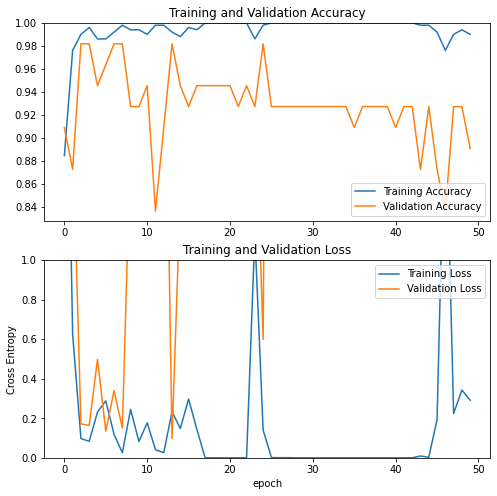

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy :', accuracy)

7/7 [==============================] - 1s 144ms/step - loss: 4.4939 - accuracy: 0.9273
Test accuracy : 0.9272727370262146


In [ ]:
model.save("model.h5")